## Day 39 - DIY SOLUTION
**Q1. Problem Statement: Random Forest** <br>
	Write a Python program that reads the TaxiFare.csv (provided on LMS) file into a DataFrame and build a good random forest model by performing the following tasks:
1.	Load the TaxiFare.csv dataset into a DataFrame
2.	Drop ‘unique_id’, and find missing values from the dataset
3.	Convert the ‘date_time_of_pickup’ column to date and time formate and extract information and create new columns as ‘hour‘, ‘dayOfTheMonth’,’ month’,   ‘dayOfTheWeek’.
4.	Find traveling distance based on given coordinates using the "Haversine" distance formula and create a new column as ‘distance’ and store the data.
5.	Eliminate some anomalous/outlier data based on certain "Domain" logic
A. Amount < 2.5 as the minimum fare is 2.5
B. Trips with travel distance less than or equal to 1, and more than 130Kms. Let’s say this was a condition provided by clients based on travel range.
6.	Extract independent variables (Xs) and dependent variables (Ys) into separate data objects
7.	Find important features using random forest.
8.	Build a model and predict the result for the test dataset based on MAPE and RMSE.


**Step-1:** Importing Libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.api import add_constant, OLS
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from io import StringIO

**Step-2:**  Load data set into dataframe.

In [2]:
df = pd.read_csv("TaxiFare.csv")

In [3]:
df

,unique_id,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,amount
0,26:21.0,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,4.5
1,52:16.0,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,16.9
2,35:00.0,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,5.7
3,30:42.0,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,7.7
4,51:00.0,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,5.3
...,...,...,...,...,...,...,...,...
49995,25:15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1,15.0
49996,19:18.0,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1,7.5
49997,53:00.0,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1,6.9
49998,09:00.0,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2,4.5


**Step-3:**  Drop unwanted columns from dataset.

In [6]:
# drop unnecessary data
df = df.drop("unique_id",axis = 1)b

KeyError: "['unique_id'] not found in axis"

In [7]:
df

,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,amount
0,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,4.5
1,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,16.9
2,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,5.7
3,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,7.7
4,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,5.3
...,...,...,...,...,...,...,...
49995,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1,15.0
49996,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1,7.5
49997,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1,6.9
49998,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2,4.5


In [8]:
df.describe()

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,amount
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,-72.509756,39.933759,-72.504616,39.926251,1.667840,11.364171
std,10.393860,6.224857,10.407570,6.014737,1.289195,9.685557
min,-75.423848,-74.006893,-84.654241,-74.006377,0.000000,-5.000000
25%,-73.992062,40.734880,-73.991152,40.734372,1.000000,6.000000
50%,-73.981840,40.752678,-73.980082,40.753372,1.000000,8.500000
75%,-73.967148,40.767360,-73.963584,40.768167,2.000000,12.500000
max,40.783472,401.083332,40.851027,43.415190,6.000000,200.000000


**Step-4:**  Missing value analysis.

In [9]:
df.isna().sum() # no missing value found

date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
amount                  0
dtype: int64

In [10]:
df.isnull().sum()

date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
amount                  0
dtype: int64

In [11]:
#check data type and other information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date_time_of_pickup   50000 non-null  object 
 1   longitude_of_pickup   50000 non-null  float64
 2   latitude_of_pickup    50000 non-null  float64
 3   longitude_of_dropoff  50000 non-null  float64
 4   latitude_of_dropoff   50000 non-null  float64
 5   no_of_passenger       50000 non-null  int64  
 6   amount                50000 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.7+ MB


**Step-5:**  Making new features based on old features.

In [12]:
# Extract various date time components as seperate indep variables
#first convert date_time_of_pickup to date and time formate
df["date_time_of_pickup"] = pd.to_datetime(df["date_time_of_pickup"])
df

,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,amount
0,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,4.5
1,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16.9
2,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,5.7
3,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,7.7
4,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,5.3
...,...,...,...,...,...,...,...
49995,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1,15.0
49996,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1,7.5
49997,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1,6.9
49998,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2,4.5


In [13]:
#spliting the hour, day, month, weeks
new_df = df.assign(hour = df["date_time_of_pickup"].dt.hour, 
                  dayOfTheMonth = df["date_time_of_pickup"].dt.day,
                  month = df["date_time_of_pickup"].dt.month, 
                  dayOfTheWeek = df["date_time_of_pickup"].dt.dayofweek)

# Remove date_time_of_pickup
new_df.drop("date_time_of_pickup", axis = 1, inplace = True)

new_df.head()

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,amount,hour,dayOfTheMonth,month,dayOfTheWeek
0,-73.844311,40.721319,-73.841610,40.712278,1,4.5,17,15,6,0
1,-74.016048,40.711303,-73.979268,40.782004,1,16.9,16,5,1,1
2,-73.982738,40.761270,-73.991242,40.750562,2,5.7,0,18,8,3
3,-73.987130,40.733143,-73.991567,40.758092,1,7.7,4,21,4,5
4,-73.968095,40.768008,-73.956655,40.783762,1,5.3,7,9,3,1


In [14]:
new_df.shape

(50000, 10)

**Step-6:**  Find traveling distance based on given coordinates using "Haversine" distance formula.

In [15]:
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c # 6367 is radius of earth in kilometers.
    return km

new_df["distance"] = haversine_np(new_df["longitude_of_pickup"], new_df["latitude_of_pickup"],
                                   new_df["longitude_of_dropoff"], new_df["latitude_of_dropoff"])

new_df.head()

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,amount,hour,dayOfTheMonth,month,dayOfTheWeek,distance
0,-73.844311,40.721319,-73.841610,40.712278,1,4.5,17,15,6,0,1.030117
1,-74.016048,40.711303,-73.979268,40.782004,1,16.9,16,5,1,1,8.444828
2,-73.982738,40.761270,-73.991242,40.750562,2,5.7,0,18,8,3,1.388653
3,-73.987130,40.733143,-73.991567,40.758092,1,7.7,4,21,4,5,2.797513
4,-73.968095,40.768008,-73.956655,40.783762,1,5.3,7,9,3,1,1.997902


Eliminate some anamolous/outlier data based on certain "Domain" logic

A. Amount < 2.5 as the minimum fare is $2.5

B. Trips with travel distance less than or equal to 1, and more than 130Kms. Lets say this was a condition range(just a hypothesis but not necessary to do it).

In [16]:
# Lets do a simple check of what range is currently present in the various variables
new_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude_of_pickup,50000.0,-72.509756,10.393860,-75.423848,-73.992062,-73.981840,-73.967148,40.783472
latitude_of_pickup,50000.0,39.933759,6.224857,-74.006893,40.734880,40.752678,40.767360,401.083332
longitude_of_dropoff,50000.0,-72.504616,10.407570,-84.654241,-73.991152,-73.980082,-73.963584,40.851027
latitude_of_dropoff,50000.0,39.926251,6.014737,-74.006377,40.734372,40.753372,40.768167,43.415190
no_of_passenger,50000.0,1.667840,1.289195,0.000000,1.000000,1.000000,2.000000,6.000000
amount,50000.0,11.364171,9.685557,-5.000000,6.000000,8.500000,12.500000,200.000000
hour,50000.0,13.489080,6.506935,0.000000,9.000000,14.000000,19.000000,23.000000
dayOfTheMonth,50000.0,15.672040,8.660789,1.000000,8.000000,16.000000,23.000000,31.000000
month,50000.0,6.273300,3.461157,1.000000,3.000000,6.000000,9.000000,12.000000
dayOfTheWeek,50000.0,3.029980,1.956936,0.000000,1.000000,3.000000,5.000000,6.000000


In [18]:
# A. Amount < 2.5 as the minimum fare is $2.5

print(new_df["amount"].describe())
fullRaw = new_df[new_df["amount"] >= 2.5]
print(new_df["amount"].describe())

count    40926.000000
mean        12.394747
std          9.652751
min          0.000000
25%          6.900000
50%          9.300000
75%         13.700000
max        165.000000
Name: amount, dtype: float64
count    40926.000000
mean        12.394747
std          9.652751
min          0.000000
25%          6.900000
50%          9.300000
75%         13.700000
max        165.000000
Name: amount, dtype: float64


In [17]:
# B. Trips with travel distance greater than or equal to 1, and less than 130Kms.

print(new_df["distance"].describe())
new_df = new_df[(new_df["distance"] >= 1) & (new_df["distance"] <= 130)]
print(new_df["distance"].describe())

count    50000.000000
mean        18.497326
std        355.341070
min          0.000000
25%          1.222378
50%          2.118783
75%          3.893124
max       8662.376766
Name: distance, dtype: float64
count    40926.000000
mean         3.919168
std          4.491177
min          1.000150
25%          1.662453
50%          2.576932
75%          4.490593
max        129.868894
Name: distance, dtype: float64


In [19]:
new_df.shape

(40926, 11)

**Step-7:** Extract independent variables (Xs) and dependent variables (Ys) into separate data objects

In [20]:


x = new_df.drop(["amount"], axis = 1).copy()
y = new_df["amount"].copy()


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state=100) 


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(32740, 10)
(8186, 10)
(32740,)
(8186,)


**Step-8:** Model building

In [21]:

from sklearn.ensemble import RandomForestRegressor

In [22]:
M1 = RandomForestRegressor(random_state=123)
M1 = M1.fit(x_train,y_train) # Indep, Dep variable

**Step-9:** Feature importance 

In [23]:
varImpDf = pd.DataFrame()
varImpDf["Importance"] = M1.feature_importances_
varImpDf["Variable"] = x_train.columns
varImpDf.sort_values("Importance", ascending = False, inplace = True)

varImpDf.head()

,Importance,Variable
9,0.833108,distance
2,0.046062,longitude_of_dropoff
3,0.033203,latitude_of_dropoff
0,0.026619,longitude_of_pickup
1,0.019757,latitude_of_pickup


**Step-10:** Prediction on test data

In [24]:
# Model Prediction on Testset

testPredDf = pd.DataFrame()

testPredDf["Prediction"] = M1.predict(x_test)

# Create a column to store actuals
testPredDf["Actual"] = y_test.values

# Validate if the above worked
testPredDf.head()

,Prediction,Actual
0,13.2817,15.5
1,9.1810,10.0
2,8.3820,8.0
3,6.1400,5.0
4,15.7530,21.0


**Step-11:** evaluate score based on RMSE and MAPE

In [25]:
# RMSE
print("RMSE",np.sqrt(np.mean((testPredDf["Actual"] - testPredDf["Prediction"])**2)))
# This means on an "average", the taxi fare prediction would have +/- error of about $4.24
# Lower the RMSE, better the model prediction

# MAPE
print("MAPE",(np.mean(np.abs(((testPredDf["Actual"] - testPredDf["Prediction"])/testPredDf["Actual"]))))*100)
# This means on an "average", the taxi fare prediction would have +/- error of ~18%
# Lower the MAPE, better the model prediction

RMSE 4.249447879749447
MAPE 18.924176905704467


**Q2. Problem Statement: Performance Measurements**<br>
Write a Python program that reads the h1n1_vaccine_prediction.csv (provided on LMS) file into a DataFrame and build a good random forest model by performing the following tasks:
1.	Load the h1n1_vaccine_prediction.csv dataset into a DataFrame
2.	Do value count for the dependent variable, and check data is imbalanced or not.
3.	Drop columns that have more than 50% missing data. And then drop all null values
4.	Print a Bar plot for the dependent variable for all categories
5.	Do label encoding for all categorical features
6.	Extract independent variables (Xs) and dependent variables (Ys) into separate data objects
7.	Build a random forest model evaluate on test data.
8.	Do oversample and then build another random forest model for test data and compare their accuracy.



**Step-1:** Importing Libraries.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing  import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from matplotlib.colors import ListedColormap
from sklearn import metrics
import seaborn as sns

**Step-2:**  Load data set into dataframe.

In [28]:
df1 = pd.read_csv("h1n1_vaccine_prediction.csv")

**Step-3:**  Data distribution of target variable.

In [29]:
df1.h1n1_vaccine.value_counts() #check data is imbalanced or not.

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [30]:
df1.shape

(26707, 34)

In [31]:
df1

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


**Step-4:**  Missing value analysis.

In [32]:
df1.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [33]:
df1 = df1.drop("has_health_insur",axis = 1) # drop this column because it has more than 45% dat is missing
df1 = df1.dropna()
df1.shape

(19642, 33)

**Step-5:**  check balance of target variable

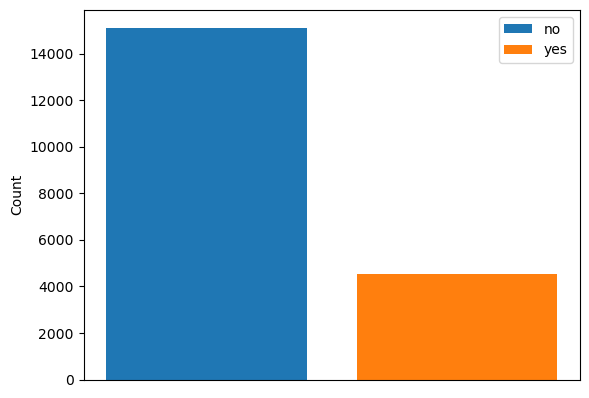

In [34]:
#Is Data Balanced?
purchased=df1[df1.h1n1_vaccine==0].h1n1_vaccine.count()
notpurchased=df1[df1.h1n1_vaccine==1].h1n1_vaccine.count()
plt.bar(0,purchased,label='no')
plt.bar(1,notpurchased,label='yes')
plt.xticks([])
plt.ylabel('Count')
plt.legend()
plt.show()

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19642 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  19642 non-null  int64  
 1   h1n1_worry                 19642 non-null  float64
 2   h1n1_awareness             19642 non-null  float64
 3   antiviral_medication       19642 non-null  float64
 4   contact_avoidance          19642 non-null  float64
 5   bought_face_mask           19642 non-null  float64
 6   wash_hands_frequently      19642 non-null  float64
 7   avoid_large_gatherings     19642 non-null  float64
 8   reduced_outside_home_cont  19642 non-null  float64
 9   avoid_touch_face           19642 non-null  float64
 10  dr_recc_h1n1_vacc          19642 non-null  float64
 11  dr_recc_seasonal_vacc      19642 non-null  float64
 12  chronic_medic_condition    19642 non-null  float64
 13  cont_child_undr_6_mnths    19642 non-null  flo

**Step-6:**  Do label encoding for each catagorical data.

In [36]:
from sklearn import preprocessing
df1.age_bracket.unique() # we need to replce age bracate with labes
le = preprocessing.LabelEncoder()
df1['age_bracket'] = le.fit_transform(df1.age_bracket.values)
df1['age_bracket']

0        3
1        1
3        4
4        2
5        4
        ..
26700    3
26701    0
26702    4
26703    0
26706    4
Name: age_bracket, Length: 19642, dtype: int32

In [37]:
df1.qualification = le.fit_transform(df1.qualification.values)
df1.qualification

0        1
1        0
3        0
4        3
5        0
        ..
26700    0
26701    2
26702    3
26703    2
26706    3
Name: qualification, Length: 19642, dtype: int32

In [38]:
df1.race = le.fit_transform(df1.race.values)
df1.sex = le.fit_transform(df1.sex.values)
df1.income_level = le.fit_transform(df1.income_level.values)
df1.marital_status = le.fit_transform(df1.marital_status.values)
df1.housing_status = le.fit_transform(df1.housing_status.values)
df1.employment = le.fit_transform(df1.employment.values)
df1.census_msa = le.fit_transform(df1.census_msa.values)


df1 # all column converted to numeric data

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,3,0,2,1,0,1,2,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,3,1,2,1,1,0,0,0.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,3,0,2,1,1,1,1,0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3,0,0,0,0,0,0,1.0,0.0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,3,1,0,0,0,0,1,2.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26700,26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,3,0,1,0,0,1,1,1.0,0.0,0
26701,26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,3,0,1,1,1,1,1,3.0,0.0,0
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,3,0,0,1,0,1,2,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,3,1,0,1,1,0,1,1.0,0.0,0


**Step-7:** Extract independent variables (Xs) and dependent variables (Ys) into separate data objects

In [39]:
x= df1.drop("h1n1_vaccine",axis = 1) #independent feature
y= df1['h1n1_vaccine'] # dependent feature 

**Step-8:** Model building before applying SMOTE

In [40]:
#before smot
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.20)
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(x_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
score1 = metrics.accuracy_score(y_test, y_pred)
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.8353270552303385


**Step-9:** Model building after applying SMOTE

In [43]:
#Over sampling the dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_smot, y_smot = oversample.fit_resample(x, y)

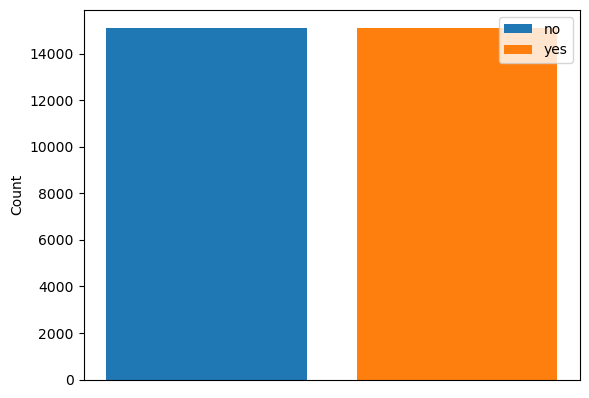

In [44]:
# after smot all class are equale.
purchased=y_smot[y_smot==0].count()
notpurchased=y_smot[y_smot==1].count()
plt.bar(0,purchased,label='no')
plt.bar(1,notpurchased,label='yes')
plt.xticks([])
plt.ylabel('Count')
plt.legend()
plt.show()

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x_smot, y_smot,test_size=0.20)

In [46]:
# model building random forest 


In [47]:
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(x_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
score2 =  metrics.accuracy_score(y_test, y_pred)
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.891606080634501


**Step-10:** Comparing both models.

In [48]:
print("before smot accuracy is:",score1)
print("after smot accuracy is:",score2)


before smot accuracy is: 0.8353270552303385
after smot accuracy is: 0.891606080634501
